In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### We will use the straightforward API from scipy to numerically approximate the solution to an ODE. For uses of the function refer to: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-6 

## Logistic ODE 

In [54]:
def logistic(t, x, r, K):
    return r*(1-x/K)*x

solRK = solve_ivp(logistic, [0,15], [y0], method='RK45', args=(0.5,20))
solBDF = solve_ivp(logistic, [0,15], [y0], method='BDF', args=(0.5,20))

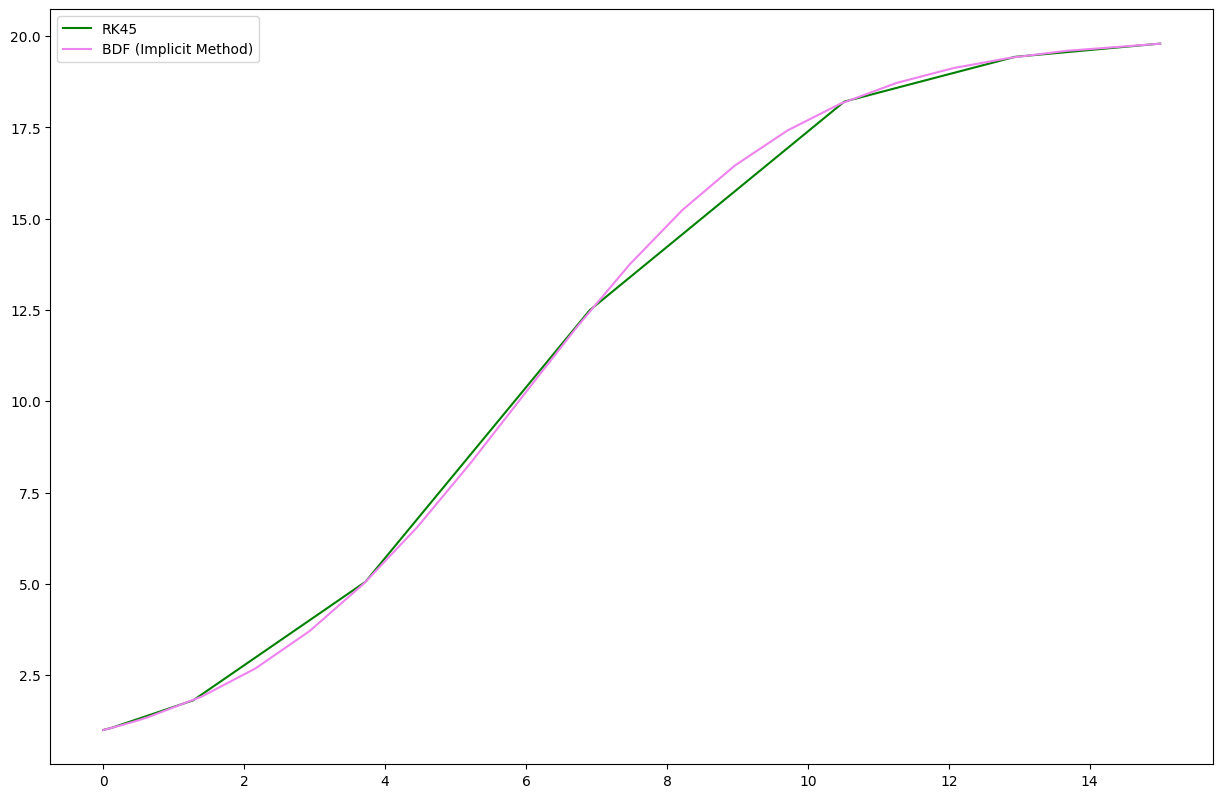

In [55]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Exponential Decay 

In [62]:
def expDecay(t,x, r=0.9):
    """
    r - represents the decaying factor
    """
    return -r*x

In [63]:
solRK = solve_ivp(expDecay, [0,10], [100], method='RK45')
solBDF = solve_ivp(expDecay, [0,10], [100], method='BDF')

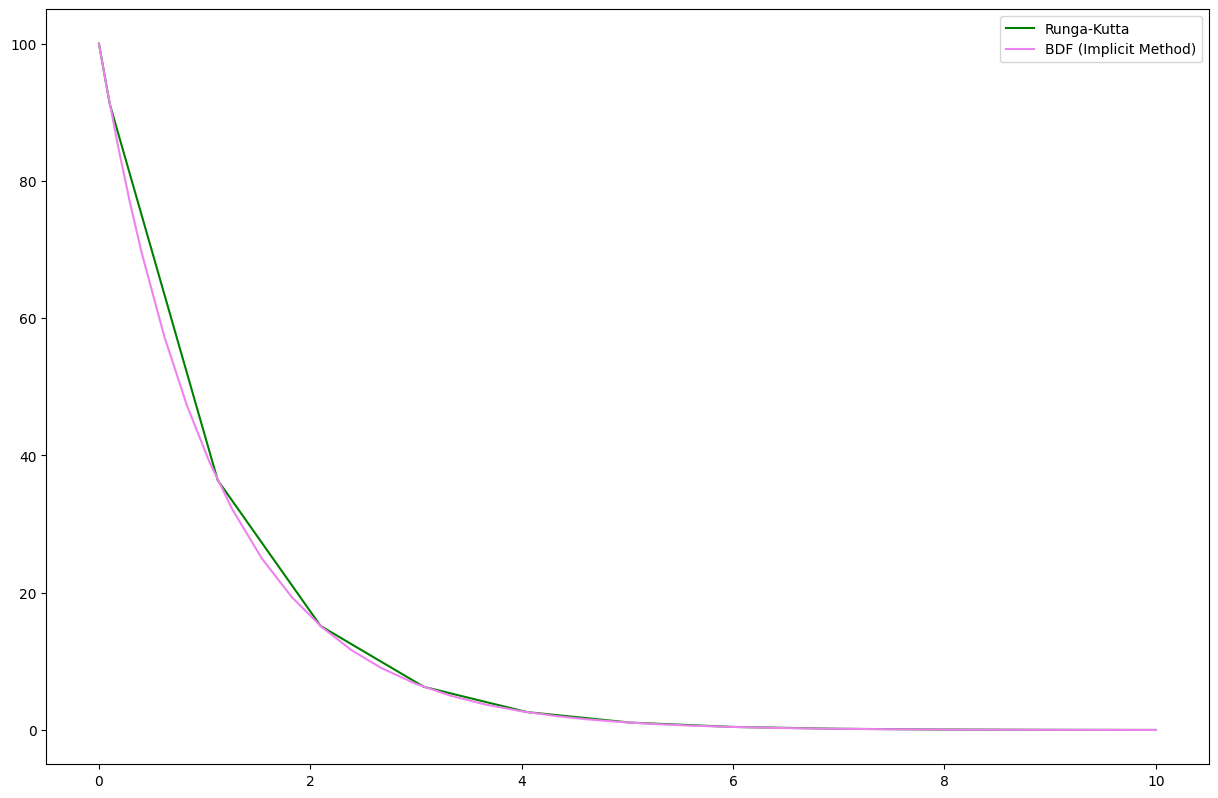

In [64]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='Runga-Kutta')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Harmonic Oscillator 

In [16]:
def harmonicOscillator(t, q, k, m):
    #define the dependent variables v=velocity, x=horizontal coord
    v, x = q
    return [-(k/m)*x, v]

In [46]:
soleRK = solve_ivp(harmonicOscillator, [0,20], [0,1],method='RK45', args=(1,1), dense_output=True) 
solBDF = solve_ivp(harmonicOscillator, [0,20], [0,1],method='BDF', args=(1,1), dense_output=True)

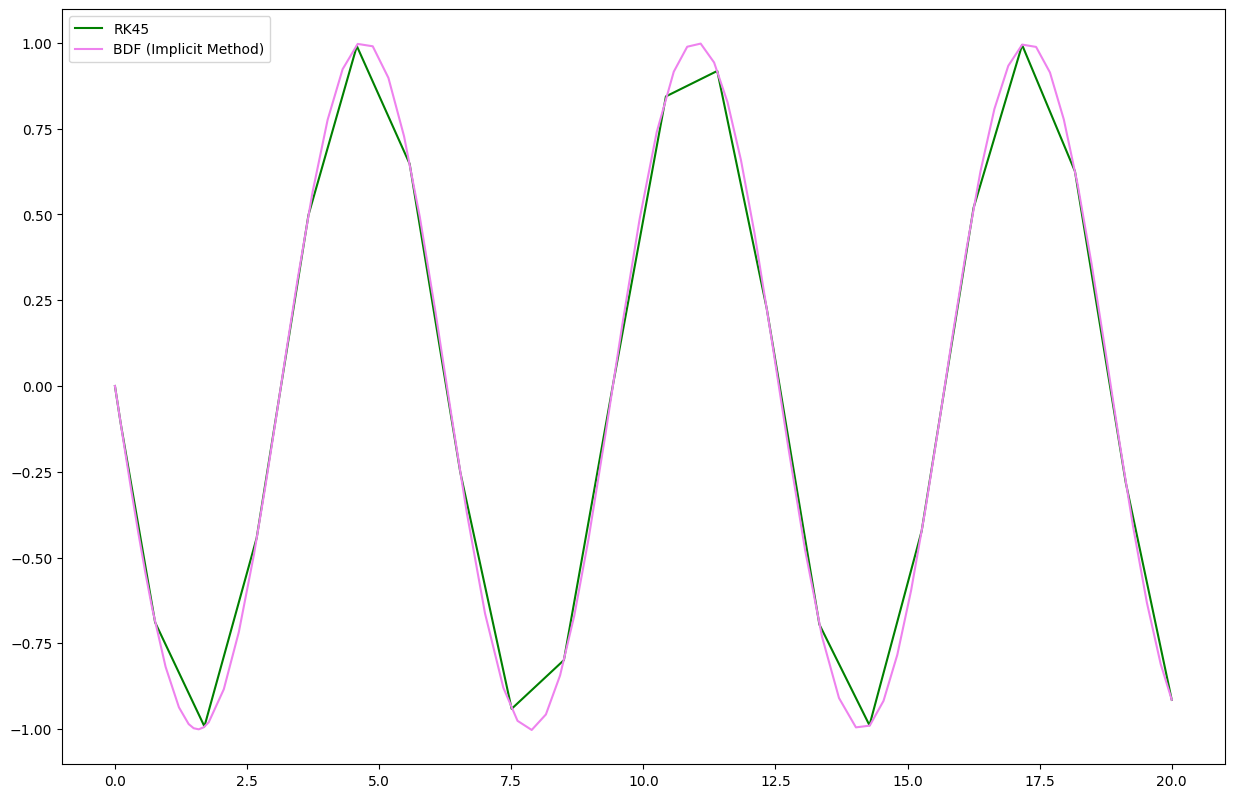

In [48]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()